In [1]:
import pandas as pd
import numpy as numpy

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols

### Question 1 
Benedrix, a machine tool company in interested in understand the impact of machine hours and production run, on its overhead cost.
The data on a monthly basis for 3 years is provided in the dataset: MLR_FactoryOverhead.csv
Fit the regression equations:
• Overhead = F (machine hours)
• Overhead = F (production runs)
• Overhead = F (machine hours, production runs)
1) Find the R-Squared in all 3 cases.
2) How would you explain the additional lift in R-squared of the combined model vs each of the individual model?

In [7]:
FactoryOverhead_df=pd.read_csv('MLR_FactoryOverhead.csv')
FactoryOverhead_df=FactoryOverhead_df.set_index(['Month'])
FactoryOverhead_df.sample(10)


,Machine Hours,Production Runs,Overhead Cost
Month,,,
27,1433,58,113137
36,1390,54,117943
23,1505,32,94564
33,1678,41,117183
19,1196,46,98693
11,1623,37,105830
31,1124,36,88371
2,1284,29,87804
15,1491,37,102622


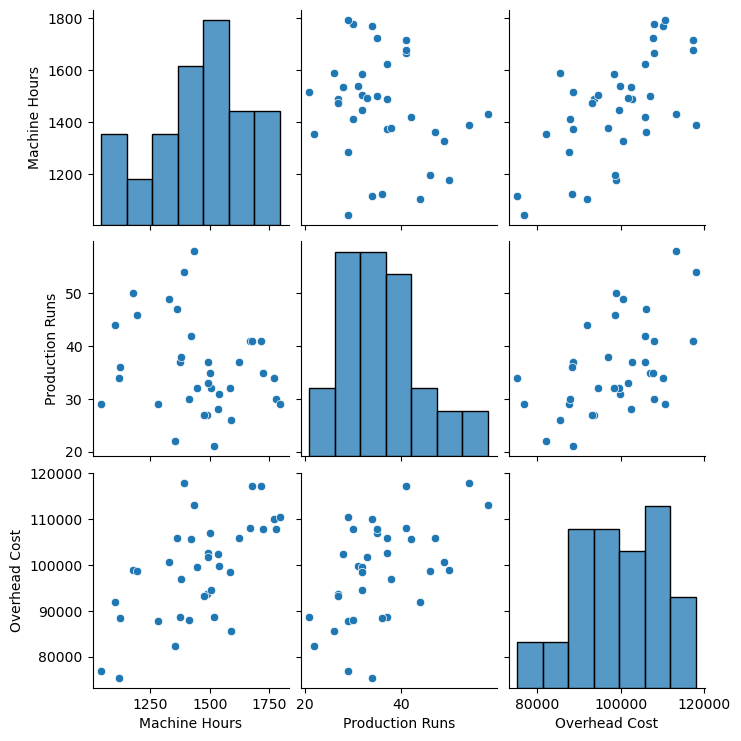

In [15]:
sns.pairplot(data=FactoryOverhead_df)

Text(0.5, 1.0, 'Machine Hours vs Overhead Cost')

<Figure size 1200x800 with 0 Axes>

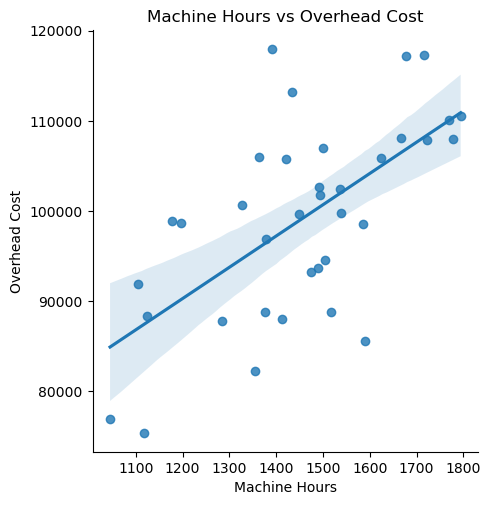

In [16]:
plt.figure(figsize=(12, 8))

sns.lmplot(x='Machine Hours', y='Overhead Cost', data=FactoryOverhead_df)

plt.title('Machine Hours vs Overhead Cost')

Text(0.5, 1.0, 'Production Runs vs Overhead Cost')

<Figure size 1200x800 with 0 Axes>

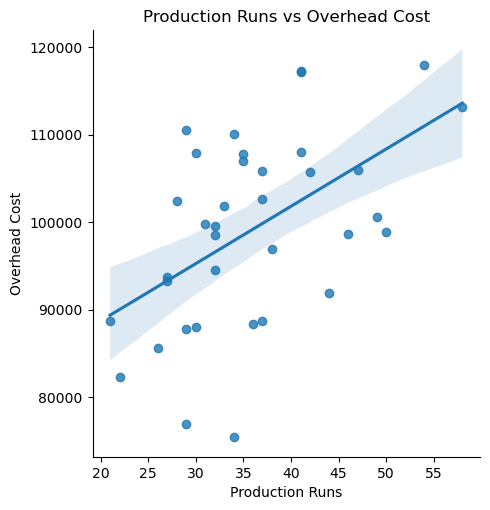

In [20]:
plt.figure(figsize=(12, 8))

sns.lmplot(x='Production Runs', y='Overhead Cost', data=FactoryOverhead_df)

plt.title('Production Runs vs Overhead Cost')

In [26]:
#Question _1_1
slope_MH, intercept_MH, r_value_MH, _, _ ,= stats.linregress(FactoryOverhead_df['Machine Hours'],FactoryOverhead_df['Overhead Cost'])

print(f'slope_MH:{slope_MH}')
print(f'Intercept_MH:{intercept_MH}')
print(f'R2_MH:{r_value_MH**2}')

print('//---------------//')

slope_PR, intercept_PR, r_value_PR, _, _ ,= stats.linregress(FactoryOverhead_df['Production Runs'],FactoryOverhead_df['Overhead Cost'])

print(f'slope_PR:{slope_PR}')
print(f'Intercept_PR:{intercept_PR}')
print(f'R2_PR:{r_value_PR**2}')

print('//---------------//')
X = FactoryOverhead_df.drop(['Overhead Cost'], axis=1)
X=sm.add_constant(X)
y = FactoryOverhead_df['Overhead Cost']

reg_model = sm.OLS(y, X).fit()

print(reg_model.params)
print(reg_model.summary())

slope_MH:34.7022364208012
Intercept_MH:48621.35463393337
R2_MH:0.3992780530435396
//---------------//
slope_PR:655.0706601982704
Intercept_PR:75605.5157139844
R2_PR:0.2709655638064029
//---------------//
const              3996.678209
Machine Hours        43.536398
Production Runs     883.617925
dtype: float64
                            OLS Regression Results                            
Dep. Variable:          Overhead Cost   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     107.0
Date:                Mon, 05 Sep 2022   Prob (F-statistic):           3.75e-15
Time:                        08:44:49   Log-Likelihood:                -349.07
No. Observations:                  36   AIC:                             704.1
Df Residuals:                      33   BIC:                             708.9
Df Model:                           2                   

In [29]:
#Question 1_2 

# The R-Square combined will continue to increse with two variables together , in comparision to when done one variable ata time.  

### Q2. MLR with categorical variables – Courier Service
GoKart is a regional delivery service company providing different types of package delivery services. An analyst wants to estimate the cost of shipping a package as function of cargo type.
Cost of 15 randomly chosen packages of approximately the same weight, shipped to almost similar distance, is provided in the file: MLR_CourierService.csv
1) Estimate the appropriate multiple linear regression equation to predict the cost of shipping a package.
2) Provide interpretation for the regression coefficients.
3) Which cargo type is the costliest? Which one is least costly?
4) How well does the regression fit the sample data? How can the goodness of fitness be improved?
5) Predict the cost of shipping a package with semi-fragile cargo.

In [31]:
CourierService_df=pd.read_csv('MLR_CourierService.csv')
CourierService_df=CourierService_df.set_index(['Shipment'])
CourierService_df.sample(10)


,CargType,CosoShipment
Shipment,,
10,Durable,25.2
9,Semifragile,102.0
2,Durable,24.0
1,Semifragile,84.0
6,Fragile,206.4
7,Semifragile,138.0
11,Fragile,130.8
3,Fragile,165.6
5,Semifragile,120.0


<AxesSubplot:title={'center':'CosoShipment'}, xlabel='CargType'>

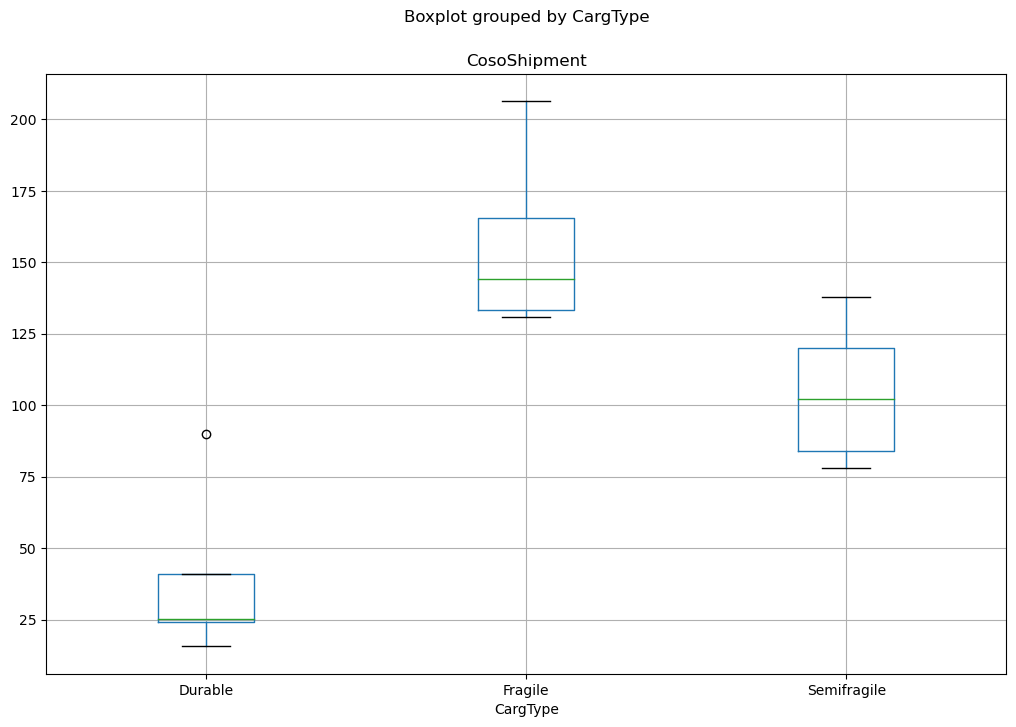

In [32]:
CourierService_df.boxplot(column=['CosoShipment'], by='CargType', figsize=(12, 8))

In [34]:
CourierService_df.groupby('CargType')['CosoShipment'].mean()

CargType
Durable         39.12
Fragile        156.00
Semifragile    104.40
Name: CosoShipment, dtype: float64

In [33]:
# we are doing dummy encoding  on CargType

result = ols('CosoShipment ~ C(CargType)', data = CourierService_df).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           CosoShipment   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     20.61
Date:                Mon, 05 Sep 2022   Prob (F-statistic):           0.000132
Time:                        10:28:51   Log-Likelihood:                -70.043
No. Observations:                  15   AIC:                             146.1
Df Residuals:                      12   BIC:                             148.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

C:\Users\sbiswal\Miniconda3\envs\dsbootcamp\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [36]:
#Q2  Regression Interpretaion
#meancost_durable
#meancost_fragie= meancost_durable + 116.88 (first coeiffcient )
#meancost_semifragile=meancost_durable +104.40 (Second coeiffcient)


#Q2_ 3 Fragile car is the costiliest , durable  cargo is the least costiliest 

#Q2_4   the R square value is 74% - a very good fit. There are outliers in the durable shipment data , by removing that we can improve Goodness of Fit.

#Q2_5 meancost_semifragile=meancost_durable +104.40 (Second coeiffcient)

### Q3: MLR with multiple variables – Employee Salary
An HR analyst in Unitech Pvt Ltd, wants to predict the annual salaries of given employees using the potential explanatory variables in the file MLR_EmpSalary.csv
1) Estimate the appropriate multiple linear regression equation to predict the salary of an Unitech employee using all explanatory variables.
2) Do we need to exclude certain columns? Why?
3) Which department employees are paid the highest? By how much?
4) Do you see any discrimination in salaries earned by male and female employees?
5) What would be the estimated salary of a Data Scientist (joining engineering) with 10 years of work experience. This woman has 18 years of total education, and will be supervising 4 junior employees.

In [38]:
EmpSalary_df=pd.read_csv('MLR_EmpSalary.csv')
EmpSalary_df=EmpSalary_df.set_index(['Employee'])
EmpSalary_df.sample(10)


,Salary,PreviousExp,YearsEmployed,YearsEducation,DirectRepotees,Female,Male,Engineering,Sales,Other
Employee,,,,,,,,,,
8,"$32,920",3,15,19,4,0,1,0,1,0
42,"$36,571",1,6,14,2,1,0,0,0,1
37,"$39,743",6,9,15,1,0,1,1,0,0
26,"$38,985",7,18,19,5,1,0,0,1,0
32,"$48,695",19,6,18,40,1,0,1,0,0
23,"$46,211",5,14,16,5,0,1,1,0,0
16,"$35,468",5,9,14,5,0,1,0,0,1
33,"$34,987",6,9,12,3,0,1,1,0,0
25,"$43,674",9,6,14,2,1,0,0,0,1
